In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
df=pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [3]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [6]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [7]:
#print(round(df['Line Item Insurance (USD)'].mean(),2))

df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(value=round(df['Line Item Insurance (USD)'].mean(),2))
df['Line Item Insurance (USD)'].head()

0    240.12
1    240.12
2    240.12
3    240.12
4    240.12
Name: Line Item Insurance (USD), dtype: float64

In [8]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117692
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,493.188408
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,7.030000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,52.940000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,241.750000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


# Working on variable: Weight (kilograms)

In [9]:
#For Weight (kilograms)
for i in range(len(df)):
    x = df.iloc[i,-3:-2].values
    if x[0].isnumeric():
        df.iloc[i,-3:-2] = float(x[0])
    else:
        df.iloc[i,-3:-2] = np.nan

In [10]:
df['Weight (Kilograms)'].isna().sum()

3952

In [11]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(value=round(df['Weight (Kilograms)'].mean(),2))
df['Weight (Kilograms)'].tail()

10319    3424.44
10320    3424.44
10321    3424.44
10322    1392.00
10323    3424.44
Name: Weight (Kilograms), dtype: float64

# Working on Variable: Freight Cost

In [12]:
df.iloc[i,-2:-1]

Freight Cost (USD)    Freight Included in Commodity Cost
Name: 10323, dtype: object

In [13]:
#For Freight Cost (USD)
for i in range(len(df)):
    x = df.iloc[i,-2:-1].values
    try:
        x[0]= float(x[0])   
    except:
        x[0] = np.nan
    df.iloc[i,-2:-1] = x[0]

In [14]:
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(value=round(df['Freight Cost (USD)'].mean(),2))
df['Freight Cost (USD)'].tail()

10319    11103.23
10320    11103.23
10321    11103.23
10322    11103.23
10323    11103.23
Name: Freight Cost (USD), dtype: float64

# Working on Variable:Dosage 

In [15]:
#Dosage
df['Dosage'].head()

0        NaN
1    10mg/ml
2        NaN
3      150mg
4       30mg
Name: Dosage, dtype: object

In [16]:
print(df.Dosage)

0                  NaN
1              10mg/ml
2                  NaN
3                150mg
4                 30mg
             ...      
10319       30/50/60mg
10320        150/300mg
10321    600/300/300mg
10322        150/300mg
10323          30/60mg
Name: Dosage, Length: 10324, dtype: object


# Working with dates

In [17]:
df['Scheduled Delivery Date'].head()

0     2-Jun-06
1    14-Nov-06
2    27-Aug-06
3     1-Sep-06
4    11-Aug-06
Name: Scheduled Delivery Date, dtype: object

In [18]:
import datetime as dt 
# #from datetime import datetime
# pd.datetime(df['Scheduled Delivery Date'],format='%d-%b-%y',)
#df['Scheduled Delivery Date'] = df['Scheduled Delivery Date'].apply(lambda x: dt.datetime.strptime(x,'%d-%b-%y'))
#df['Scheduled Delivery Date'].head()

In [19]:
data = df[['Freight Cost (USD)','Weight (Kilograms)','Unit Price','Pack Price','Brand','Vendor','Shipment Mode','Country']].copy()

In [20]:
data.head()

,Freight Cost (USD),Weight (Kilograms),Unit Price,Pack Price,Brand,Vendor,Shipment Mode,Country
0,780.34,13.0,0.97,29.00,Reveal,RANBAXY Fine Chemicals LTD.,Air,Côte d'Ivoire
1,4521.50,358.0,0.03,6.20,Generic,Aurobindo Pharma Limited,Air,Vietnam
2,1653.78,171.0,0.80,80.00,Determine,Abbott GmbH & Co. KG,Air,Côte d'Ivoire
3,16007.06,1855.0,0.07,3.99,Generic,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Air,Vietnam
4,45450.08,7590.0,0.05,3.20,Generic,Aurobindo Pharma Limited,Air,Vietnam


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

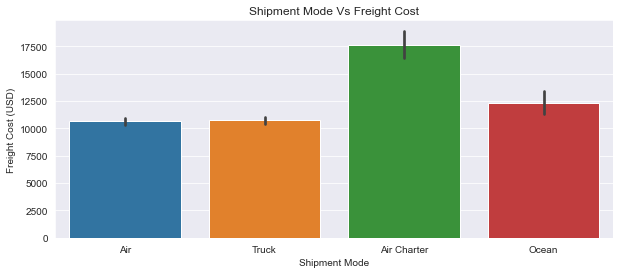

In [22]:
plt.figure(figsize=(10,4))
plt.xticks(rotation = 0)
fig1 = sns.barplot(data['Shipment Mode'],y='Freight Cost (USD)',data=data)
plt.title('Shipment Mode Vs Freight Cost')
plt.savefig('fig1.png',facecolor='w')

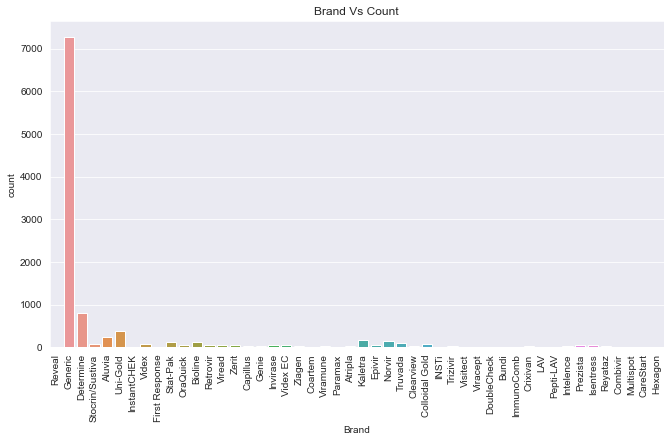

In [23]:
plt.figure(figsize=(11,6))
plt.xticks(rotation = 90)
fig2 = sns.countplot(data['Brand'],data=data)
plt.title('Brand Vs Count')
plt.savefig('fig2.png',facecolor='w')

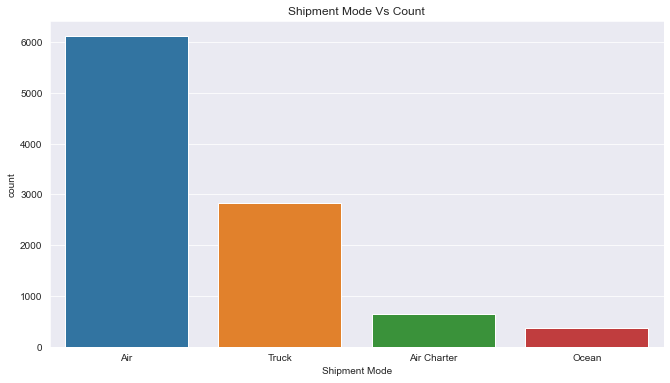

In [24]:
plt.figure(figsize=(11,6))
plt.xticks(rotation = 0)
fig3 = sns.countplot(data['Shipment Mode'],data=data)
plt.title('Shipment Mode Vs Count')
plt.savefig('fig3.png',facecolor='w')

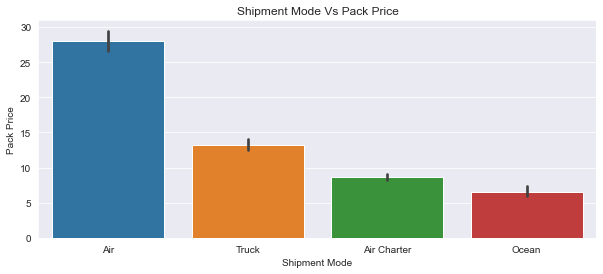

In [25]:
plt.figure(figsize=(10,4))
plt.xticks(rotation = 0)
fig4 = sns.barplot(data['Shipment Mode'],y='Pack Price',data=data)
plt.title('Shipment Mode Vs Pack Price')
plt.savefig('fig4.png',facecolor='w')

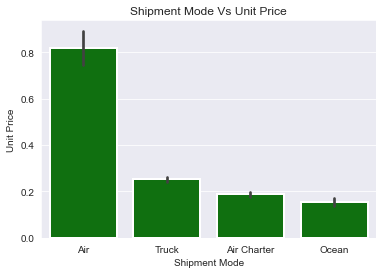

In [26]:
fig8 = sns.barplot(x=data['Shipment Mode'],y=data['Unit Price'] ,color='green', linestyle='-',linewidth=2)
plt.title('Shipment Mode Vs Unit Price')
plt.savefig('fig8.png')

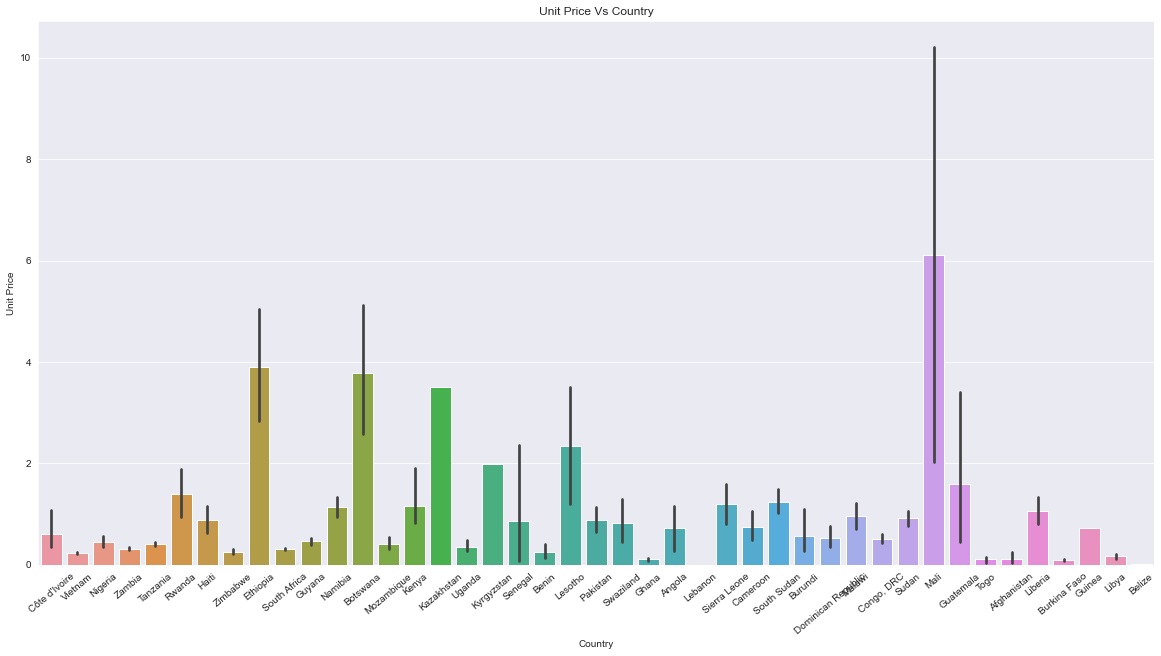

In [27]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 40)
fig5 = sns.barplot(x='Country',y='Unit Price',data=data)
plt.title('Unit Price Vs Country')
plt.savefig('fig5.png',facecolor='w')

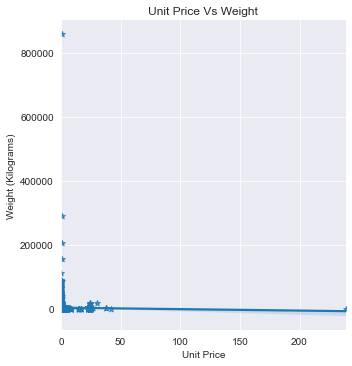

In [28]:
fig6 = sns.lmplot(x='Unit Price',y='Weight (Kilograms)',data=data,markers='*')
plt.title('Unit Price Vs Weight')
plt.savefig('fig6.png',facecolor='w')

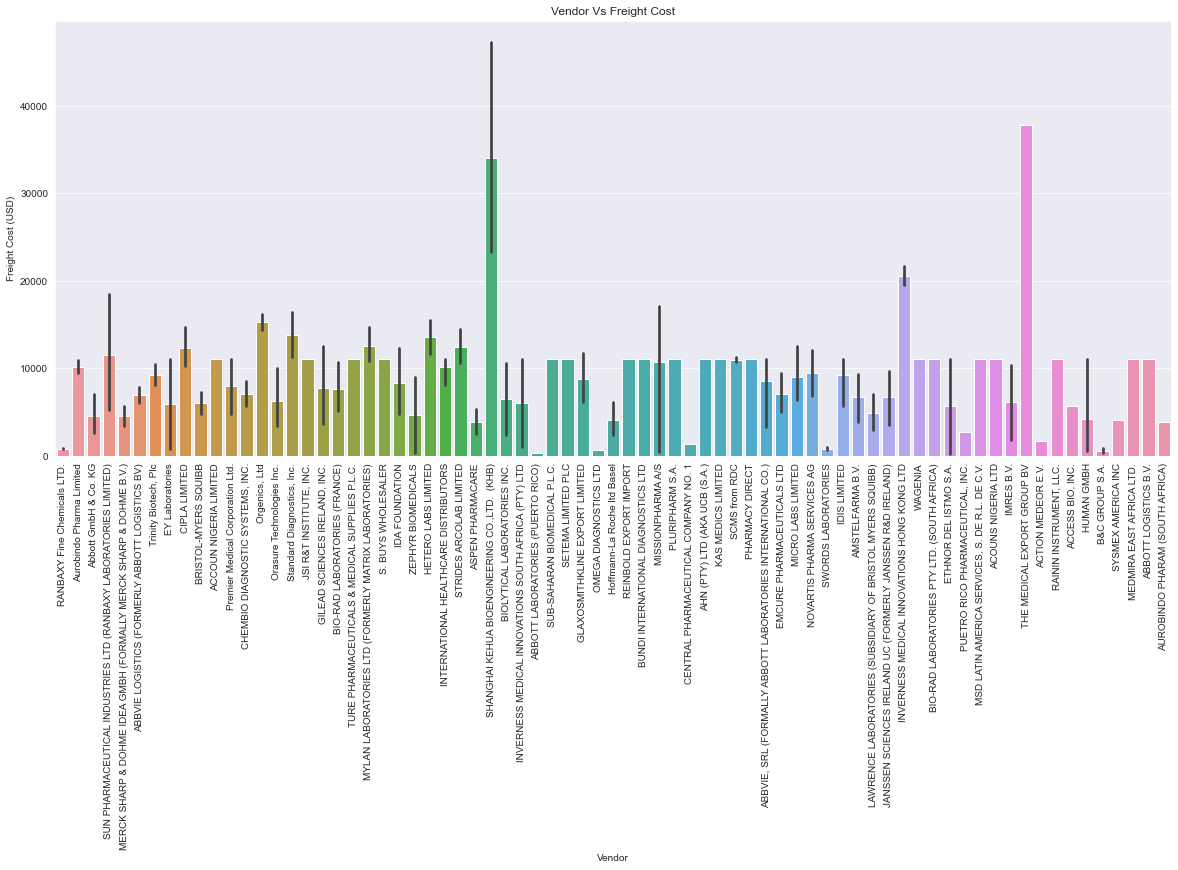

In [29]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
fig7 = sns.barplot(x='Vendor',y='Freight Cost (USD)',data=data)
plt.title('Vendor Vs Freight Cost')
plt.savefig('fig7.png',facecolor='w')

In [30]:
data = pd.get_dummies(data,columns=['Shipment Mode','Country','Brand','Vendor'])

In [31]:
data.shape

(10324, 172)

In [32]:
data.head(10)

,Freight Cost (USD),Weight (Kilograms),Unit Price,Pack Price,Shipment Mode_Air,Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Country_Afghanistan,Country_Angola,...,Vendor_SUB-SAHARAN BIOMEDICAL P.L.C.,Vendor_SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED),Vendor_SWORDS LABORATORIES,Vendor_SYSMEX AMERICA INC,"Vendor_Standard Diagnostics, Inc.",Vendor_THE MEDICAL EXPORT GROUP BV,Vendor_TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.,"Vendor_Trinity Biotech, Plc",Vendor_WAGENIA,Vendor_ZEPHYR BIOMEDICALS
0,780.34,13.00,0.97,29.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4521.50,358.00,0.03,6.20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1653.78,171.00,0.80,80.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16007.06,1855.00,0.07,3.99,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,45450.08,7590.00,0.05,3.20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5920.42,504.00,0.02,5.35,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11103.23,328.00,0.36,32.40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6212.41,1478.00,0.06,3.65,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,11103.23,3424.44,0.03,1.95,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11103.23,643.00,0.34,41.10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
y = pd.DataFrame(data['Freight Cost (USD)'])
X = pd.DataFrame(data.loc[:,data.columns != 'Freight Cost (USD)'])

In [37]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [38]:
lm = LinearRegression()

In [39]:
model = lm.fit(X_train,y_train)

In [40]:
predictions = model.predict(X_test)

In [41]:
print(lm.score)

<bound method RegressorMixin.score of LinearRegression()>


In [42]:
def mape(actual,pred):
    actual,pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual-pred)/actual))*100
actual = data['Freight Cost (USD)']
pred = lm.predict(X_test)
mape(X_test,predictions)

<ipython-input-42-2bb646157833>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual-pred)/actual))*100


inf

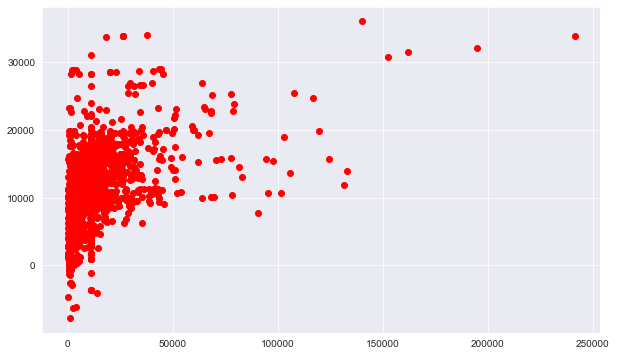

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions,marker='o',color='red')

In [44]:
data['Weight (Kilograms)'].isna().sum()

0

In [45]:
data['Unit Price'].isna().sum()

0

In [46]:
data['Pack Price'].isna().sum()

0

In [47]:
data['Freight Cost (USD)'].isna().sum()

0

In [48]:
import statsmodels
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [49]:
y = pd.DataFrame(data['Freight Cost (USD)'])
X = pd.DataFrame(data[['Pack Price','Unit Price','Weight (Kilograms)']])

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [51]:
lm = LinearRegression()

In [52]:
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
predictions = lm.predict(X_test)

In [54]:
print('The coefficients are:\n',lm.coef_)

The coefficients are:
 [[-5.26475560e+00  1.91207264e+02  1.75836377e-01]]


Text(0, 0.5, 'y_predicted')

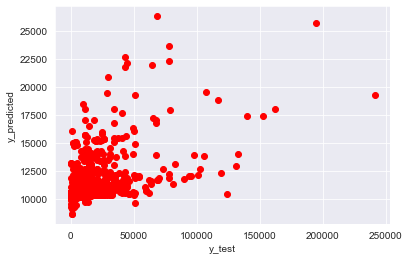

In [55]:
plt.scatter(y_test,predictions,color='red')

plt.xlabel('y_test')
plt.ylabel('y_predicted')

In [56]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

def mape(actual,pred):
    actual,pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual-pred)/actual))*100
actual = data['Freight Cost (USD)']
pred = lm.predict(X_test)

MAE: 5707.318676240373
MSE: 161503375.3315086
RMSE: 12708.397827086961


In [57]:
mape(actual,predictions)

430.21075085839584

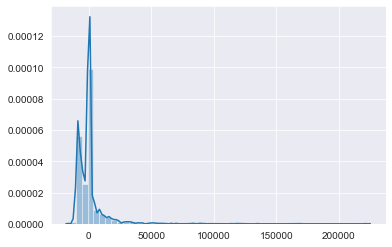

In [58]:
sns.distplot((y_test-predictions),bins=50)

In [70]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [69]:
y = data['Unit Price']
X = data.drop('Unit Price',axis=1)

In [61]:
model = sm.OLS(y,X)

In [62]:
training = model.fit()
result = training.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit Price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2412.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:24:56   Log-Likelihood:                -8022.5
No. Observations:               10324   AIC:                         1.637e+04
Df Residuals:                   10164   BIC:                         1.752e+04
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Freight Cost (USD)                                                         1.33e-06   4.71e-07      2.827      0.005    4.08e-07    2.25e-06
Weight (Kilograms)                                                        3.221e-07   5.35e-07      0.603      0.547   -7.26e-07    1.37e-06
Pack Price                                                                  -0.0081      0.000    -23.556      0.000      -0.009      -0.007
Shipment Mode_Air                                                           -0.0874      0.033     -2.624      0.009      -0.153      -0.022
Shipment Mode_Air Charter                                                   -0.0622      0.043     -1.449      0.147      -0.146       0.022
Shipment Mode_Ocean                                                         -0.0786      0.052     -1.508      0.132      -0.181       0.024
Shipment Mode_Truck                                                         -0.0717      0.034     -2.136      0.033      -0.138      -0.006
Country_Afghanistan                                                          3.6941      0.385      9.604      0.000       2.940       4.448
Country_Angola                                                               3.5695      0.201     17.741      0.000       3.175       3.964
Country_Belize                                                               3.4745      0.524      6.628      0.000       2.447       4.502
Country_Benin                                                                3.6218      0.149     24.277      0.000       3.329       3.914
Country_Botswana                                                             4.3255      0.073     59.455      0.000       4.183       4.468
Country_Burkina Faso                                                         3.3961      0.372      9.119      0.000       2.666       4.126
Country_Burundi                                                              3.5732      0.064     56.162      0.000       3.448       3.698
Country_Cameroon                                                             3.6130      0.071     50.721      0.000       3.473       3.753
Country_Congo, DRC                                                           3.6385      0.044     82.396      0.000       3.552       3.725
Country_Côte d'Ivoire                                                        3.6504      0.037     99.115      0.000       3.578       3.723
Country_Dominican Republic                                                   3.7725      0.083     45.289      0.000       3.609       3.936
Country_Ethiopia                                                             3.5372      0.050     71.250      0.000      

In [63]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('updated_data.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
data.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [65]:
print(mean_squared_error(data['Pack Price'], data['Unit Price'], squared=False))
print(mean_squared_error(data['Weight (Kilograms)'], data['Unit Price'], squared=False))
print(mean_squared_error(data['Freight Cost (USD)'], data['Unit Price'], squared=False))

49.69555716799546
11164.268626278028
16533.47844244238


In [66]:
model.score

<bound method OLS.score of <statsmodels.regression.linear_model.OLS object at 0x7fd96a762400>>

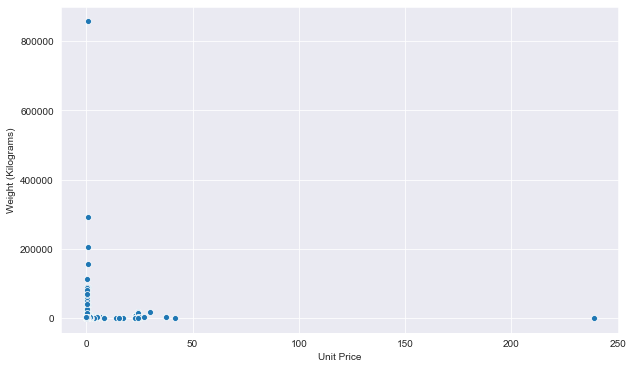

In [67]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='Unit Price',y='Weight (Kilograms)',data=data)